# Double Finite Square Well
The double finite square well is an interesting problem because it shows, in a very rudamentary way, how you can get binding between two atoms simply because they share a particle. The idea is that the overall energy of the system wants to trend to the minimum.

We follow the now familiar recipe to get the energy levels of a quantum system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar=1
m=1
N = 4096
x_min = -50.0
x_max = 50
x = np.linspace(x_min,x_max,N)
# We want to store step size, this is the reliable way:
h = x[1]-x[0] # Should be equal to 2*np.pi/(N-1)
a=2.
b=2*a
V0 = -1.
#
#
V=np.zeros(N)
for i in range(N):
    if x[i] > -a -b/2. and x[i]< -b/2.:
        V[i]= V0
    elif x[i] > b/2. and x[i] < b/2. + a :
        V[i]= V0

Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]
#


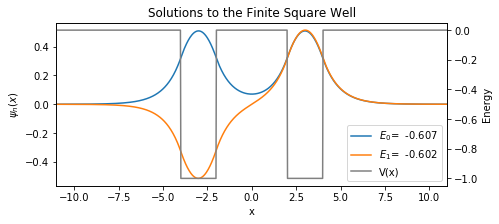

In [3]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(111)
ax1.set_xlabel("x")
ax1.set_ylabel("$\psi_n(x)$")
for i in range(2):
    if E[i]<0:                 # Only plot the bound states. The scattering states are not reliably computed.
        if psi[i][N//2+10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
            ax1.plot(x,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
        else:
            ax1.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))

            plt.title("Solutions to the Finite Square Well")

# Plot the potential as well, on a separate y axis
ax2 = ax1.twinx()
ax2.set_ylabel("Energy")                            # To get separate energy scale
ax2.plot(x,V,color="Gray",label="V(x)")
ax1.set_xlim((-a-b-5,a+b+5))
legendh1,labels1 = ax1.get_legend_handles_labels()  # For putting all legends in one box.
legendh2,labels2 = ax2.get_legend_handles_labels()
plt.legend(legendh1+legendh2,labels1+labels2,loc="lower right")
plt.savefig("Double_Finite_Square_Well_WaveFunctions1.pdf")
plt.show()

We now repeat the above calculation for a number of widths of the barrier between the wells and then plot the energy of the ground state and the first excited state against the width $b$. You can clearly see that the ground state moves up in energy, and the first excited state down, until they are almost the same energy.

In [4]:
E_dw=[]
psi_dw=[]
b_arr = [0.,0.25*a,0.5*a,0.75*a,1.*a,1.25*a,1.5*a,1.75*a,2.*a,2.5*a,3.*a,4.*a,5.*a]
for b in b_arr:
    V0 = -1.
    V=np.zeros(N)
    for i in range(N):
        if x[i] > -a -b/2. and x[i]< -b/2.:
            V[i]= V0
        elif x[i] > b/2. and x[i] < b/2. + a :
            V[i]= V0
    Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
    H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
    E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
    psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]

    E_dw.append(E)
    psi_dw.append(psi)
    


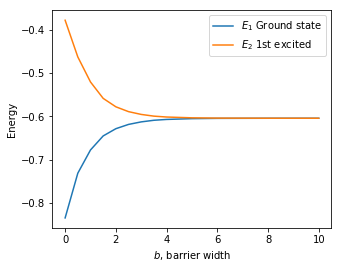

In [5]:
fig = plt.figure(figsize=(5,4))
E_0=[E_dw[i][0] for i in range(len(b_arr))]
E_1=[E_dw[i][1] for i in range(len(b_arr))]
plt.xlabel("$b$, barrier width")
plt.ylabel("Energy")
plt.plot(b_arr,E_0,label="$E_1$ Ground state")
plt.plot(b_arr,E_1,label="$E_2$ 1st excited")
plt.legend()
plt.savefig("Double_Finite_Well_Energies.pdf")
plt.show()